## **Name**: Harrison Xu
## **Status**: UG2
## **Department**: Computer Science

# ***CBE 512. Machine Learning in Chemical Science and Engineering.***
## **Assignment 06:** *Cheminformatics, Clustering, and Dimension Reduction*
### &#169; Princeton University
### **DUE**: 11:59pm, December 06, 2024
### **Notes**: Supply responses/solutions in a packaged format, including notebook (.ipynb) and any supporting files required to run the notebook. Your assignment should be submitted to Canvas.



---
## **Problem 1. Concept Checks (20 points):**

**(a)** Pick two clustering techniques from distinct algorithmic classes (e.g., partition, distribution, hierarchical, density-based). Describe the methdological essence of your chosen techniques. In this description, highlight any requisite hyperparameters as well as prospective advantages and disadvantages.

---


***Student Response:***

**The two clustering techniques I will be discussing are partition and density-based clustering techniques.**

**For partition clustering methods, clustering occurs by classifying information into multiple groups based on characteristics and similarity of data. After the user specifies a k number of clusters, the algorithm randomly assigns k of the data points as cluster centers, and then assign each data point to the nearest cluster center. Then, the cluster centers are re-assigned by taking the mean of all of the data points in a cluster. This process is repeated, where the cluster centers get updated, and then each data point gets reassigned to a specific cluster center, until the clusters converge. The general goal of partition clustering is to form clusters that minimize within-cluster variation but maximize the difference between clusters. The required hyperparameters for partition clustering is the inclusion of the number of clusters, k. Some advantages for partition clustering techniques is that there's a simple implementation and is very scalable to larger datasets, resulting in fairly quick computational calculation. Some disadvantages is that outliers are very influential on partition clustering techniques, resulting in skewed results. Another disadvantage is the fact that you have to identify the number of clusters beforehand, which can be difficult to determine when dealing with complex datasets.**

**For density-based clustering methods, the main process is that clusters simply dense regions in feature vector space. This means that clusters can hold any shape, as long as there is high density of samples. One example of this is DBSCAN. The process is that it generates core points (which are points with more than a certain number of neighbors, N_min), and then generates a cluster for each newly generated core point that is not already in a cluster. Then, you recursively go through each neighboring point and add that to the cluster or create a new cluster. Thus, clusters are only formed based on the vicinity of points and can cluster irregular shapes, whereas something like partition clustering techniques tend to work well with only finding spherical-shaped clusters. Some hyperparameters that DBSCAN has to identify are epsilon, which defines the minimum distance threshold for two points to be neighbors, and N_min, which is the minimum number of neighbors within an epsilon radius for a point to become a core point. Some advantages of density-based clustering methods is that it can handle more complex datasets that have irregularly shaped clusters, and you wouldn't have to specify the number of clusters before hand. Some disadvantages is that you have to specify epsilon and N_min, which are both sensitive hyperparameters that could significantly change the clustering results.**

**(b)** In class, we described two conventional approaches to molecular featurization. The first is predicated on the generation of *fingerprints* (usually bit vectors), and the second relates to the generation of *vectors of descriptors*. Describe the basic elements of each, commenting on potential advantages or disadvantages as related to property-prediction tasks.

---

***Student Response:***

**Molecular featurization with fingerpoints is a method to represent molecules where a molecule is represented by a bit vector that represents the presence or absence of specific substructures within the molecule. Some advantages for molecular fingerprints are that they are computationally efficient to generate and that they can express molecular features fairly simply. Some disadvantages associated with molecular fingerprints are that it completely ignores the chemical properties of the molecule and also does not include 3D arrangement of the molecule. This could lead to many important aspects of the molecule being overlooked when being used for property-prediction tasks.**

**Molecular featurization using vectors of descriptors is a different method, where, instead of featurizing the molecule based on structural features, you use the molecule's physicochemical descriptors to describe the molecule. This could include things such as log P, shape parameters, electronic parameters, number of hydrogen bonds, etc. Some advantages to using descriptor vectors is that they can directly provide representations of molecules properties', and they can be used in systems that are non-molecular such as in materials sciences. Some disadvantages to descriptor vectors is that it is difficult to obtain extensive descriptor vectors because some descriptors require wet lab experimentation to obtain.**

**(c)** Suppose you are using molecular fingerprints as your featurization approach to molecules. In class, we mentioned multiple ways to think of *similarity* or *dissimilarity* between pairs of molecules. Pick one and describe how it works. What are the challenges with using Euclidean distances to express dissimilarity?

---

***Student Response:***

**When it comes to something like molecular fingerprints, you are given a bit vector representation to represent the molecule. Thus, to calculate the similarity or dissimilarity of two molecules, one useful metric is the Tanimoto (or Jaccard) index, which essentially calculates the number of features that is shared among the two molecules and divides that by the number of unique features held by both of the molecules in total. Thus, a Tanimoto index of 1 means there is maximal similarity, whereas an index of 0 means there is minimal similarity.**

**Euclidean distances are harder to use because all of the dimensions of the molecular fingerprint bit vectors are perpendicular. What this means is that if there is one difference in bit vectors, then we get a distance of 1. If there is two differences, we get a distance of sqrt(2). Three differences means a distance of sqrt(3). This can be misleading because that means each additional difference makes less impact (the difference between 1 and sqrt(2) is bigger than the difference between sqrt(2) and sqrt(3)). This can be misleading and make two molecules seem not as different as they actually should be.**



---

## **Problem 2. Examining Mid-Infrared Spectra of Plastic Waste (80 points):**

In this problem, we are going to try out some dimensionality reduction and clustering techniques. We will use mid-infrared (MIR) spectral data from the mixed plastic dataset available in our [github](https://github.com/webbtheosim/CBE512-MLinChmSciEng/blob/main/data/plastic_ir.pickle) (take a look, it is named `plastic_ir.pickle`). MIR spectroscopy offers an advantage over traditional infrared (IR) spectroscopy, as it can differentiate between various types of black plastics, which IR cannot. The paper associated with this dataset is available at (https://par.nsf.gov/servlets/purl/10482351).

---



**(a)** Download and process `plastic_ir.pickle`.
```
  with open('plastic_ir.pickle', 'rb') as handle:
      spectra = pickle.load(handle)
      labels = pickle.load(handle)
      wavenumbers = pickle.load(handle)
```
The dataset consists of a (500, 975) spectra array containing 500 MIR plastic spectra, each with 975 data points. The labels array, shaped (500,), indicates the type of plastic for each spectrum. The wavenumber array, shaped (975,), provides corresponding wavenumber values in cm^-1. Visualize the dataset by plotting the raw spectra, grouping them by their labels. Use the same color for spectra with the same label. Hint: You can use `np.unique`. Additionally, comment on the noises you observe.

---



In [ ]:
!git clone https://github.com/webbtheosim/CBE512-MLinChmSciEng.git

Cloning into 'CBE512-MLinChmSciEng'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 209 (delta 31), reused 20 (delta 20), pack-reused 153 (from 1)
Receiving objects: 100% (209/209), 63.95 MiB | 10.76 MiB/s, done.
Resolving deltas: 100% (78/78), done.
Updating files: 100% (65/65), done.


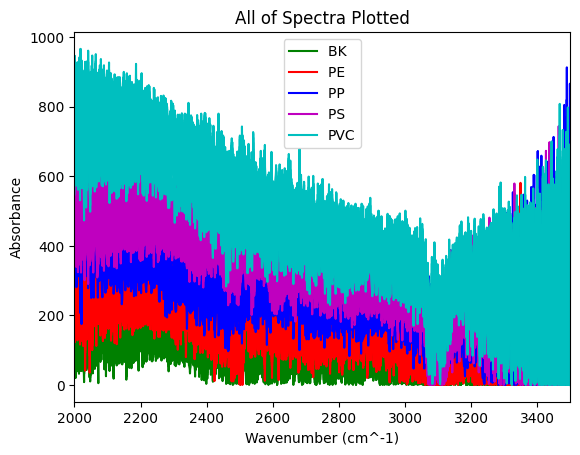

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open('/content/CBE512-MLinChmSciEng/data/plastic_ir.pickle', 'rb') as handle:
  spectra = pickle.load(handle)
  labels = pickle.load(handle)
  wavenumbers = pickle.load(handle)

colors = ['g', 'r', 'b', 'm', 'c']

unique_labels = np.unique(labels)
for i in range(len(unique_labels)):
  temp = 0
  for num in range(0, 500):
    if labels[num] == unique_labels[i]:
      if (temp == 0):
        plt.plot(wavenumbers, spectra[num], color=colors[i], label = unique_labels[i])
        temp+=1
      else:
        plt.plot(wavenumbers, spectra[num], color=colors[i], label = "_nolegend_")
plt.title("All of Spectra Plotted")
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber (cm^-1)")
plt.xlim([wavenumbers[0], wavenumbers[-1]])
plt.legend()
plt.show()

**When looking at the graph, it looks like there is the general trend that, as we go down the legend, the plastics that show up earlier in the legend are lower in absorbance at pretty much all wavenumbers, while the plastics that are lower down in the legend absorb much more.**

**(b)** Utilize a dimensionality reduction technique to create a two-dimensional projection of the spectra data. You can use a linear technique or a [non-linear manifold learning technique](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold). Often, linear techniques (like PCA) are actually applied as a preprocessing step prior to deploying non-linear techniques that may be computationally expensive. Visualize your results.

Additionally, apply smoothing to the original spectra using techniques such as moving average or the Savitzky-Golay filter. After smoothing, perform dimensionality reduction and analyze whether any differences are observed compared to the unsmoothed data.

---

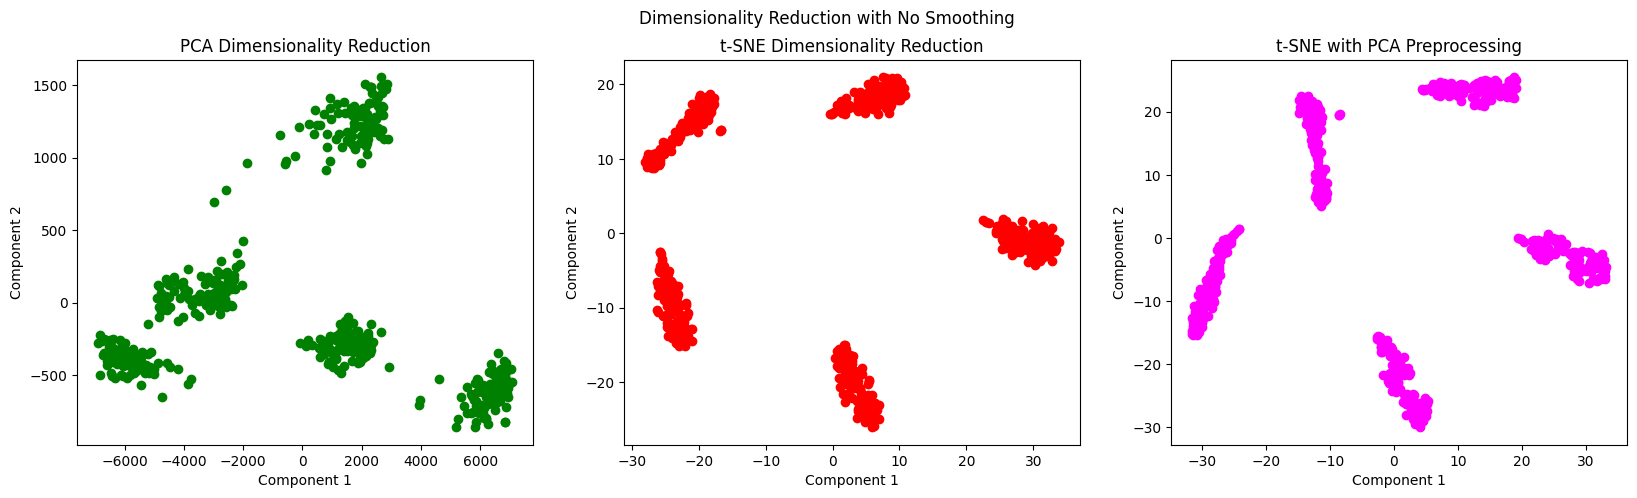

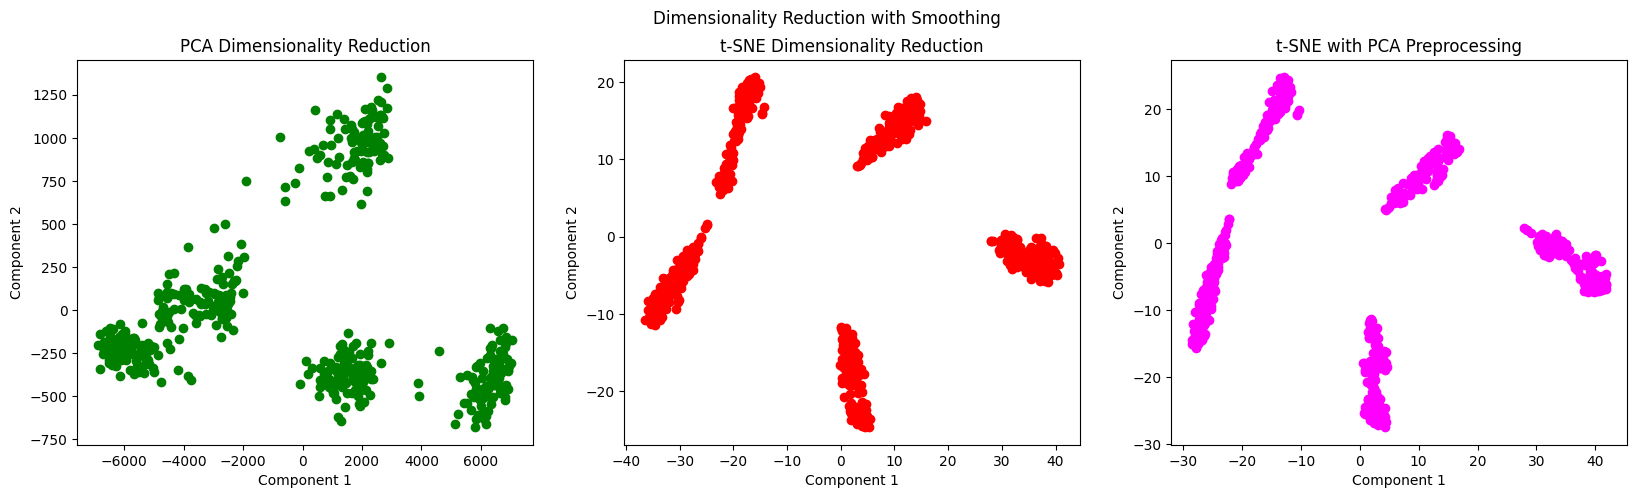

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.signal import savgol_filter

def dim_reduce(ncomp, data, name):
  fig, axes = plt.subplots(1, 3, figsize=(20, 5))

  fig.suptitle(f"Dimensionality Reduction with {name}")

  pca = PCA(n_components = ncomp)
  pca.fit(data)

  spectra_transform = pca.transform(data)

  ax = axes[0]
  ax.set_title("PCA Dimensionality Reduction")
  ax.set_xlabel("Component 1")
  ax.set_ylabel("Component 2")
  ax.scatter(spectra_transform[:, 0], spectra_transform[:, 1], c='green', marker='o')

  tsne = TSNE(n_components = 2)
  tsne_transform = tsne.fit_transform(data)

  ax = axes[1]
  ax.set_title("t-SNE Dimensionality Reduction")
  ax.set_xlabel("Component 1")
  ax.set_ylabel("Component 2")
  ax.scatter(tsne_transform[:, 0], tsne_transform[:, 1], c='red', marker='o')


  tsne_pca_transform = tsne.fit_transform(spectra_transform)

  ax = axes[2]
  ax.set_title("t-SNE with PCA Preprocessing")
  ax.set_xlabel("Component 1")
  ax.set_ylabel("Component 2")
  ax.scatter(tsne_pca_transform[:, 0], tsne_pca_transform[:, 1], c='magenta', marker='o')

  plt.show()
  return spectra_transform, tsne_transform, tsne_pca_transform

spectra_transform, tsne_transform, tsne_pca = dim_reduce(ncomp = 5, data = spectra, name = "No Smoothing")

smooth_spectra = savgol_filter(spectra, 10, 5, axis = 1)


smooth1, smooth2, smooth3 = dim_reduce(ncomp = 5, data = smooth_spectra, name = "Smoothing")

**Looking at the dimensionlity reduction techniques and how the smoothing affects them, it seems that the smoothing doesn't make a large difference. This is because we can see that before and after smoothing, there are fairly well defined clusters (at least for the non-linear dimensionality reduction techniques) and there is the same number of these clusters. One observation is that after smoothing, it seems that the two clusters towards the left of the graphs look noticeably closer to each other. This can imply that smoothing the dataset can cause the two clusters on the left side to look more similar to each other.**

**(c)** Select a clustering technique of interest, such as k-means or DBSCAN, and perform clustering in the projection-space obtained from the unsupervised learning algorithm using the unsmoothed original data. Study how clustering results are affected by changing hyperparameters associated with the clustering technique and monitoring the silhouette score. Are there natural clusters in the data/do the clusters make sense?

It may be useful to select a specific cluster and another cluster far away to inspect whether plastics within one cluster seem intuitively more related than those in the distant cluster. Without necessarily doing so (although you may if you wish), how could you further quantify whether intra-cluster spectra similarity is higher than between-group spectra similarity, apart from using [cluster-based metrics](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation) themselves?

---

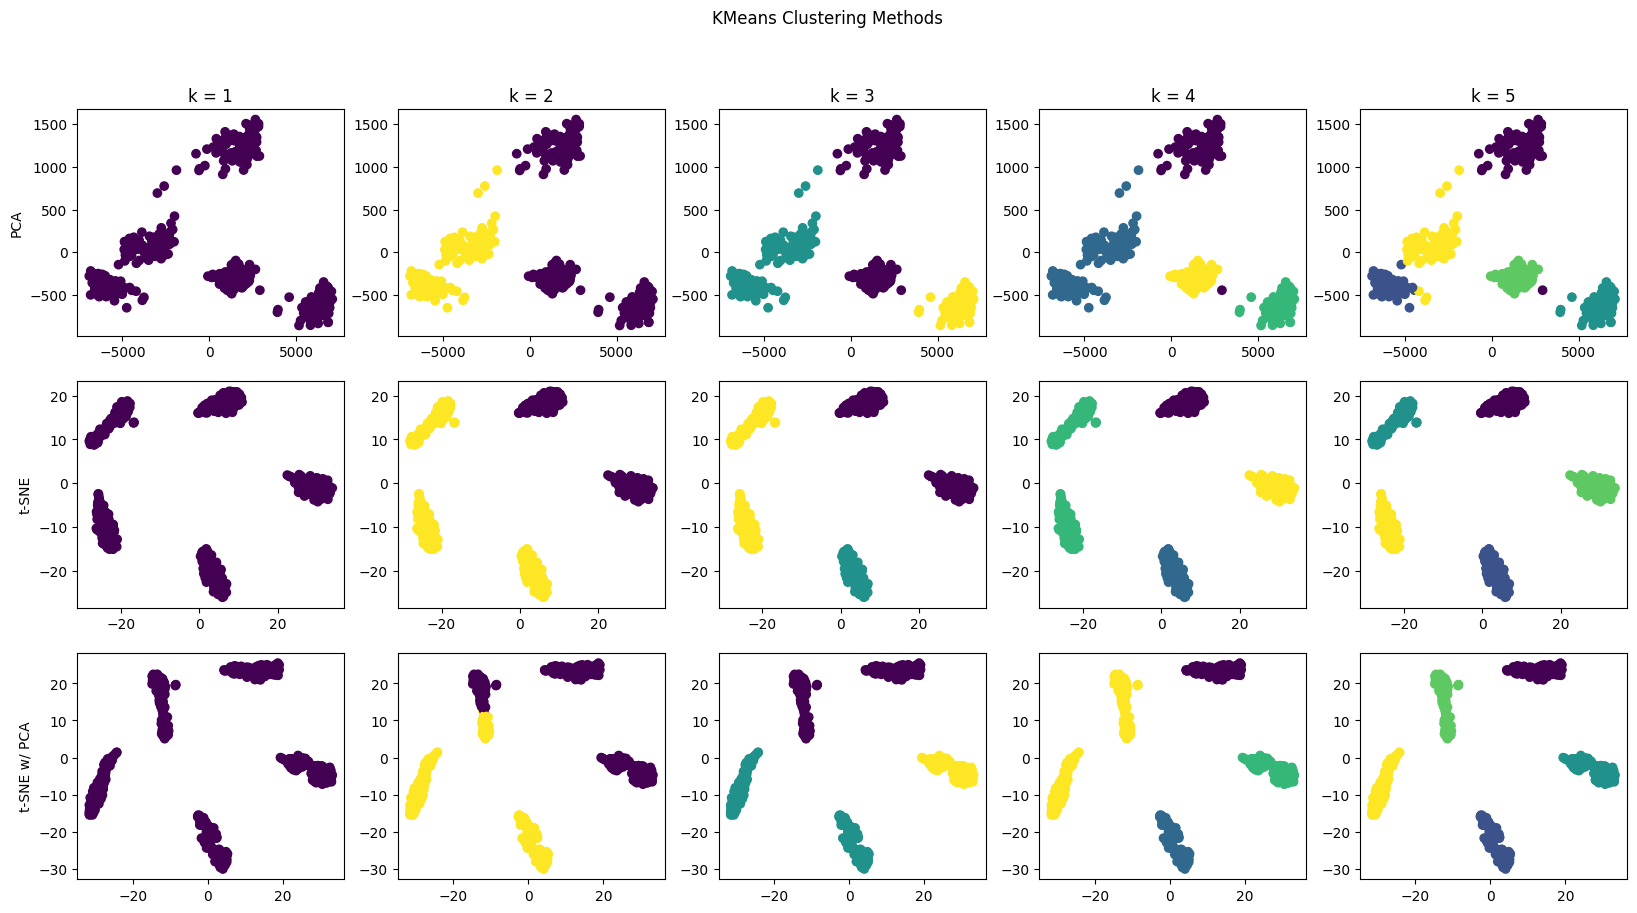

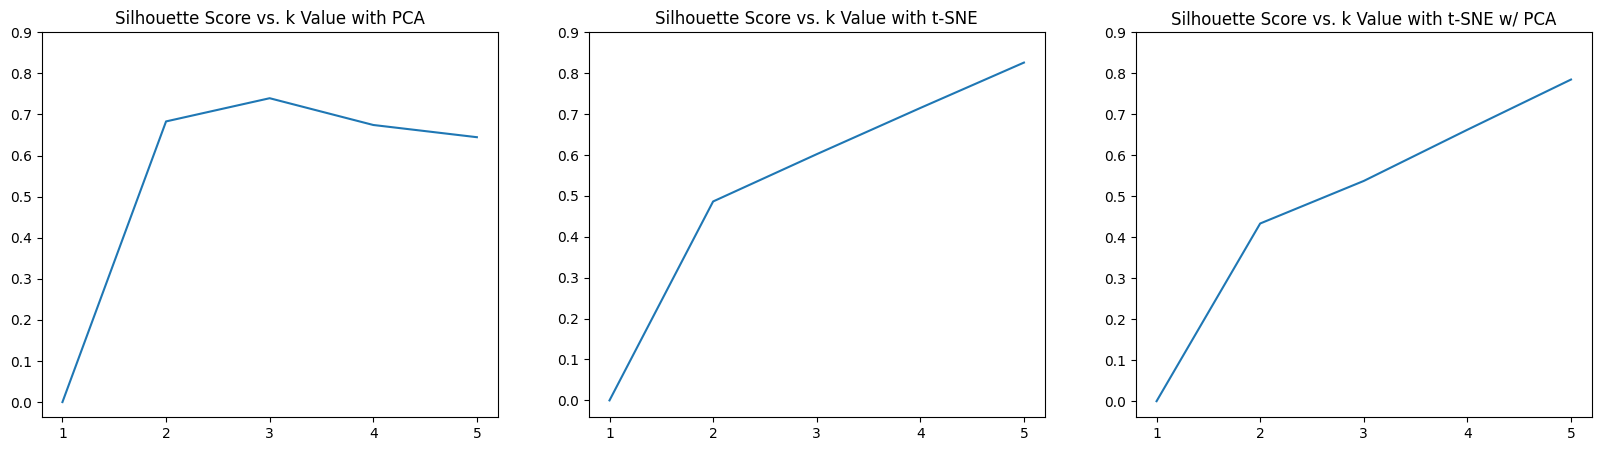

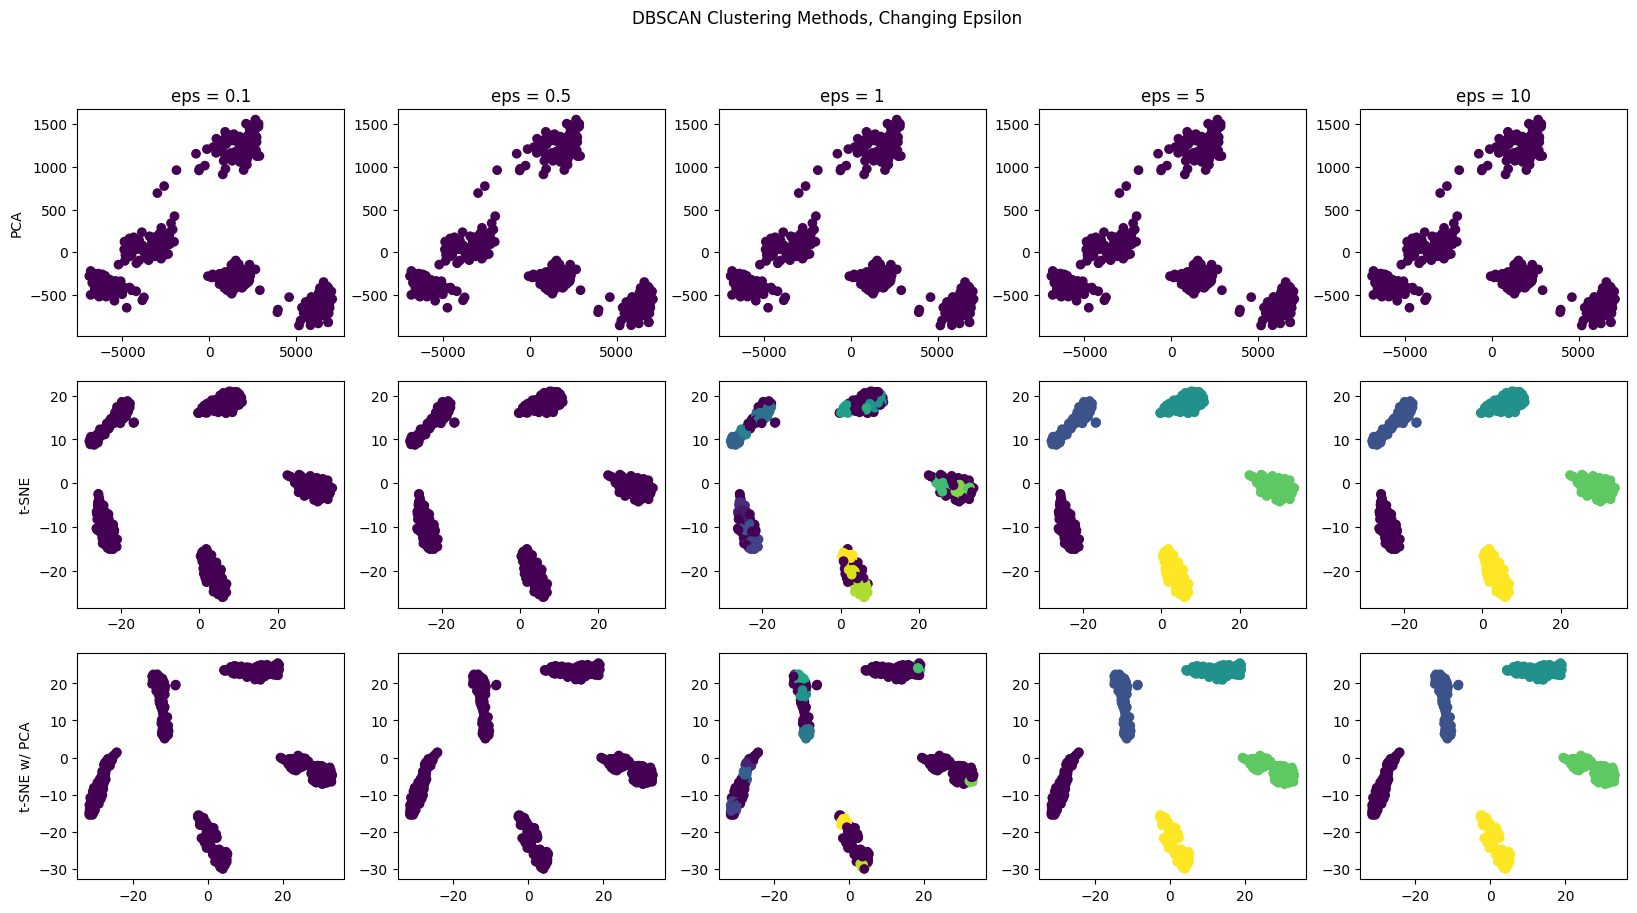

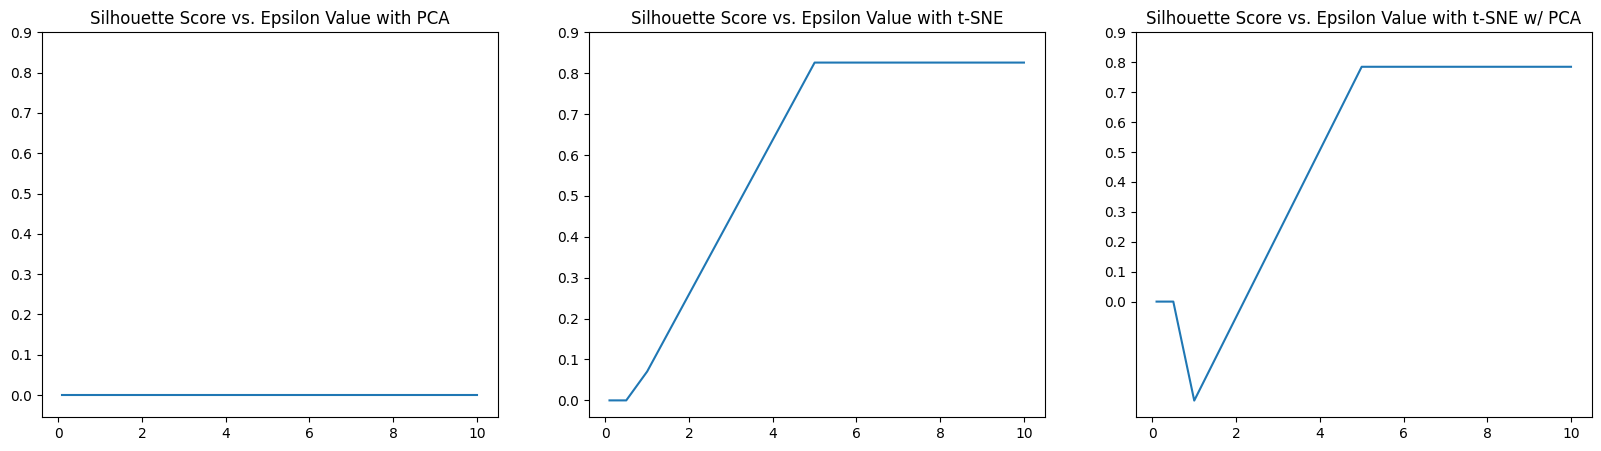

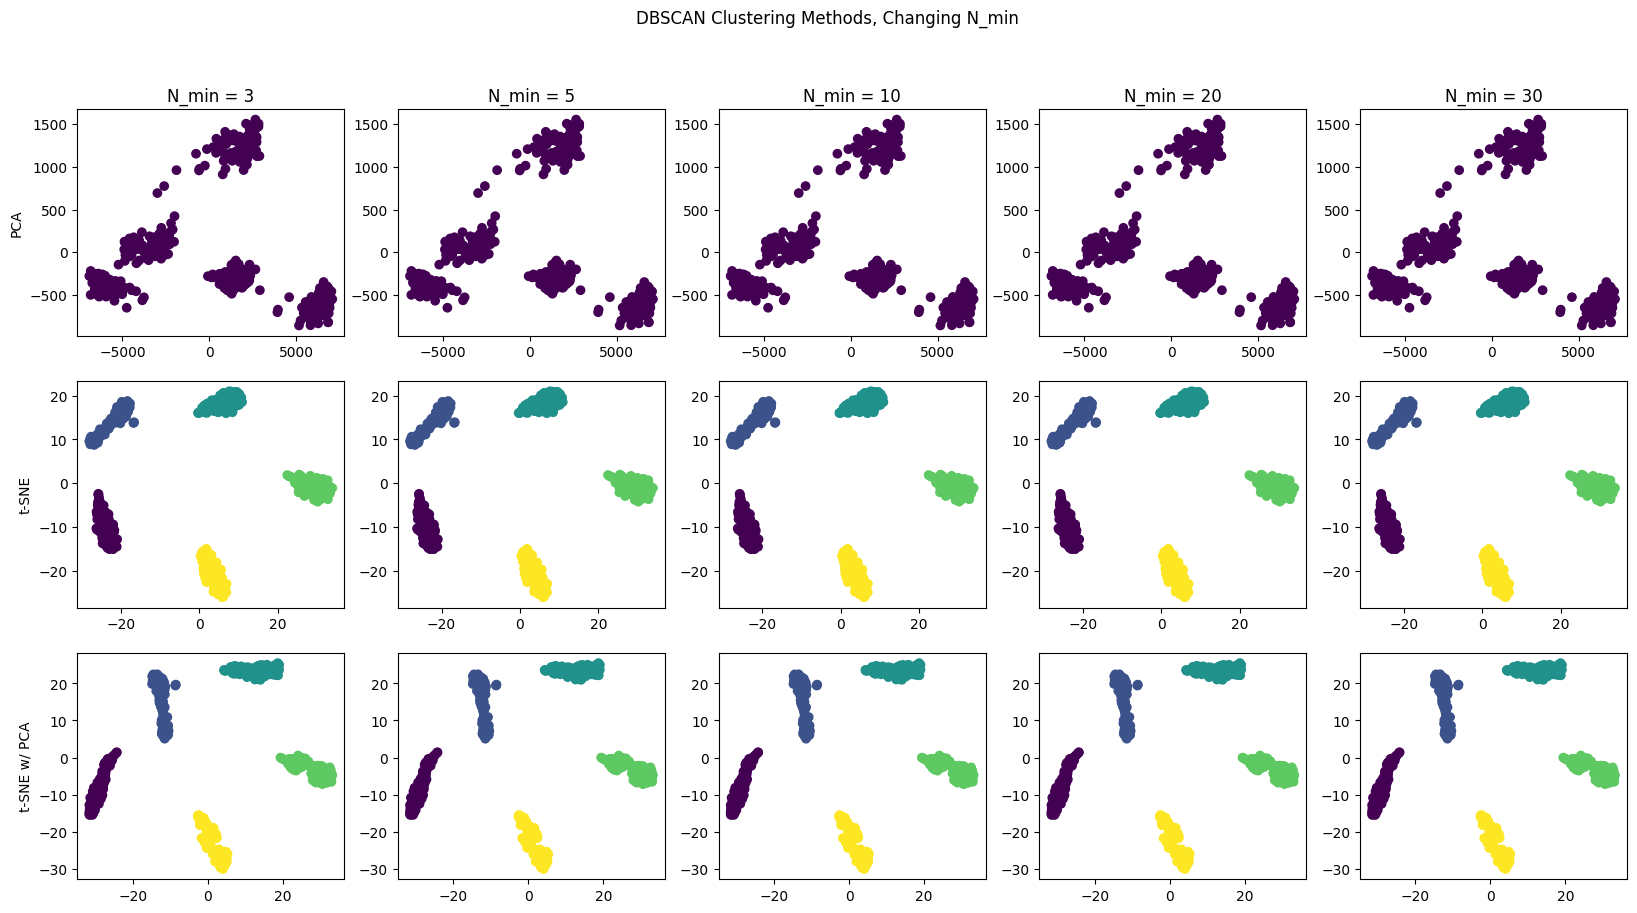

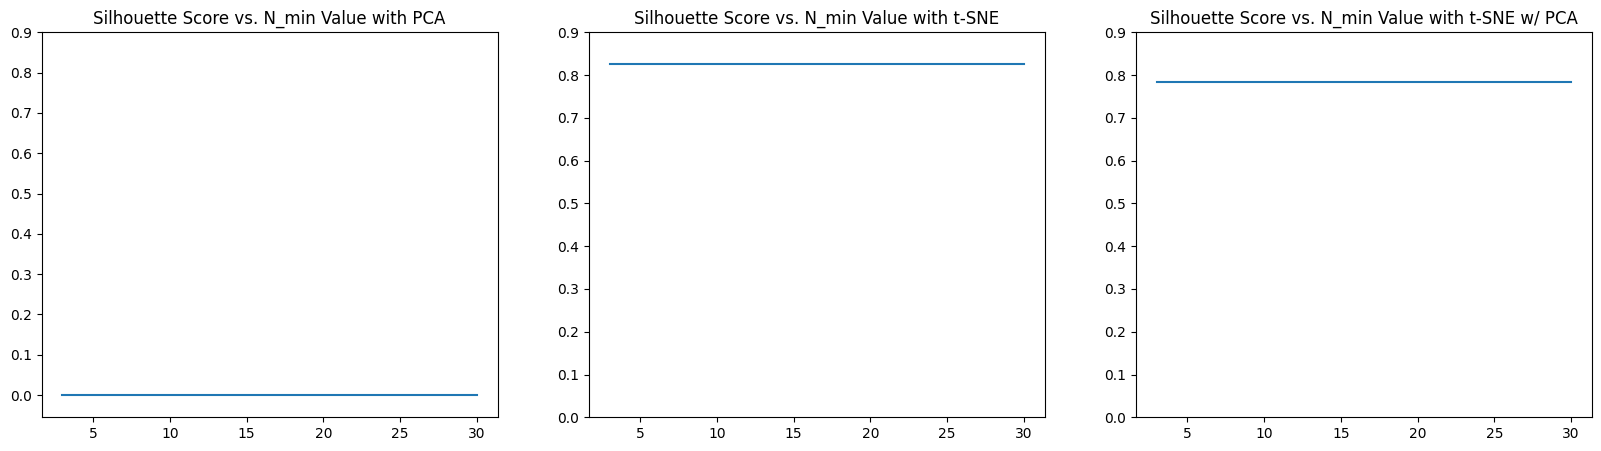

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

data = [spectra_transform, tsne_transform, tsne_pca]

kmax = 5
fig,axes = plt.subplots(3, 5, figsize = (20, 10))
fig.suptitle("KMeans Clustering Methods")
fig2, axes2 = plt.subplots(1, 3, figsize = (20, 5))
for j in range(0, 3):
  sil = [0.]
  for i in range(1, kmax + 1):
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(data[j])
    labels = kmeans.labels_
    if i > 1:
      sil.append(silhouette_score(data[j][:, 0:2], labels, metric='euclidean'))
    ax = axes[j][i - 1]
    ax.scatter(data[j][:, 0], data[j][:, 1], c=labels, cmap='viridis', marker='o')
    if (j == 0):
      ax.set_title(f"k = {i}")

    if (i == 1):
      if (j == 0):
        ax.set_ylabel("PCA")
      if (j == 1):
        ax.set_ylabel("t-SNE")
      if (j == 2):
        ax.set_ylabel("t-SNE w/ PCA")

  ax2 = axes2[j]
  ax2.plot(range(1, kmax + 1), sil)
  ax2.set_xticks(np.arange(1, 6, 1))
  ax2.set_yticks(np.arange(0, 1, 0.1))
  temp = ""
  if (j == 0):
    temp = "PCA"
  elif (j == 1):
    temp = "t-SNE"
  else:
    temp = "t-SNE w/ PCA"
  ax2.set_title(f"Silhouette Score vs. k Value with {temp}")
plt.show()


fig, axes = plt.subplots(3, 5, figsize = (20, 10))
fig.suptitle("DBSCAN Clustering Methods, Changing Epsilon")
epsilon = [0.1, 0.5, 1, 5, 10]
fig2, axes2 = plt.subplots(1, 3, figsize = (20, 5))
for j in range(0, 3):
  sil = []
  for i in range(1, kmax + 1):
    dbscan = DBSCAN(eps = epsilon[i - 1], min_samples = 10).fit(data[j])
    labels = dbscan.labels_
    ax = axes[j][i - 1]
    s = set(labels)
    if len(s) > 1:
      sil.append(silhouette_score(data[j][:, 0:2], labels, metric='euclidean'))
    else:
      sil.append(0)
    ax.scatter(data[j][:, 0], data[j][:, 1], c=labels, cmap='viridis', marker='o')
    if (j == 0):
      ax.set_title(f"eps = {epsilon[i - 1]}")

    if (i == 1):
      if (j == 0):
        ax.set_ylabel("PCA")
      if (j == 1):
        ax.set_ylabel("t-SNE")
      if (j == 2):
        ax.set_ylabel("t-SNE w/ PCA")
  ax2 = axes2[j]
  ax2.plot(epsilon, sil)
  ax2.set_yticks(np.arange(0, 1, 0.1))
  temp = ""
  if (j == 0):
    temp = "PCA"
  elif (j == 1):
    temp = "t-SNE"
  else:
    temp = "t-SNE w/ PCA"
  ax2.set_title(f"Silhouette Score vs. Epsilon Value with {temp}")
plt.show()

fig, axes = plt.subplots(3, 5, figsize = (20, 10))
fig2, axes2 = plt.subplots(1, 3, figsize = (20, 5))
fig.suptitle("DBSCAN Clustering Methods, Changing N_min")
n_min = [3, 5, 10, 20, 30]
for j in range(0, 3):
  sil = []
  for i in range(1, kmax + 1):
    dbscan = DBSCAN(eps = 5, min_samples = n_min[i - 1]).fit(data[j])
    labels = dbscan.labels_
    s = set(labels)
    if len(s) > 1:
      sil.append(silhouette_score(data[j][:, 0:2], labels, metric='euclidean'))
    else:
      sil.append(0)
    ax = axes[j][i - 1]
    ax.scatter(data[j][:, 0], data[j][:, 1], c=labels, cmap='viridis', marker='o')
    if (j == 0):
      ax.set_title(f"N_min = {n_min[i - 1]}")

    if (i == 1):
      if (j == 0):
        ax.set_ylabel("PCA")
      if (j == 1):
        ax.set_ylabel("t-SNE")
      if (j == 2):
        ax.set_ylabel("t-SNE w/ PCA")
  ax2 = axes2[j]
  ax2.plot(n_min, sil)
  ax2.set_yticks(np.arange(0, 1, 0.1))
  temp = ""
  if (j == 0):
    temp = "PCA"
  elif (j == 1):
    temp = "t-SNE"
  else:
    temp = "t-SNE w/ PCA"
  ax2.set_title(f"Silhouette Score vs. N_min Value with {temp}")
plt.show()

**I decided to use KMeans and DBSCAN to analyze the clustering techniques. As you can see above, the first set of graphs is found by varying the k value for KMeans. The second set of graphs is found by using DBSCAN and varying the values of epsilon. The last set of graphs is found by using DBSCAN and varying the values of N_min (min number of neighbors). There are natural clusters in the data, and the clusters that are formed from KMeans k = 5 and the DBSCAN graphs that contain an epsilon value of 5 or 10 are reasonable in that they make 5 clusters. When changing the k value for the KMeans algorithm, the clustering algorithm seems the most effectively analyze the data with k = 5. In contrast, DBSCAN seems to depend on the epsilon value more. By keeping N_min and changing the epsilon value, the clustering algorithm looks significantly different with each change in epsilon. It seems that eps = 5 or eps = 10 are the best values for distinguishing the 5 clusters. In contrast, eps = 1, eps = 0.5, and eps = 0.1 are too small that it seems that most to all of the data points are treated as noise.**

**One possible method to quantify whether intra-cluster similarity is greater than inter-cluster similarity is by calculating a similarity measure (such as cosine similarity, Pearson correlation, or some other similarity metric) between all pairs of spectra, and calculate the average intra-cluster similarity for all spectra within the same cluster, and then calculate the average inter-cluster similarity for spectra across clusters. Then you can simply divide the mean intra-cluster similarity by the mean inter-cluster similarity. If this ratio is large, then this means that there is high similarity within clusters and less similarity between different clusters.**